In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [3]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [4]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir,sequences = ['00', '01'], img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data


In [5]:
kitti_data.normalize()

normalized data


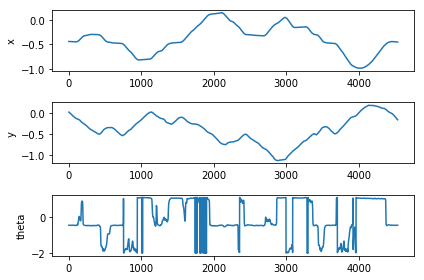

In [6]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.prev_poses['00'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

In [7]:
inputs, velocities = kitti_data.load_data_input_model(sequences = ['00','01'])

In [8]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/15)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(5264, 50, 150, 6)
(5264, 2)
(376, 50, 150, 6)
(376, 2)


In [9]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.001,
         seed=235,
         learning_rate=1e-5,
         epoch=50,
         batch_size=128,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.001
seed=235
learning_rate=1e-05
number of batches for training: 41
epoch 1 
Best validation error! iteration:1 valid_error: 0.8810418248176575
Best validation error! iteration:2 valid_error: 0.7390855550765991
Best validation error! iteration:3 valid_error: 0.605760931968689
Best validation error! iteration:5 valid_error: 0.5887971520423889
Best validation error! iteration:6 valid_error: 0.5713350772857666
Best validation error! iteration:9 valid_error: 0.5596818327903748
Best validation error! iteration:14 valid_error: 0.555144190788269
Best validation error! iteration:18 valid_error: 0.5479098558425903
Best validation error! iteration:19 valid_error: 0.5406147837638855
Best validation error! iteration:23 valid_error: 0.5370057225227356
Best validation error! iteration:24 valid_error: 0.5348256826400757
Best validation error! iteratio

Best validation error! iteration:1372 valid_error: 0.20904581248760223
epoch 35 
epoch 36 
Best validation error! iteration:1444 valid_error: 0.20887421071529388
Best validation error! iteration:1454 valid_error: 0.20043116807937622
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
Best validation error! iteration:1652 valid_error: 0.1988966166973114
Best validation error! iteration:1655 valid_error: 0.1986612230539322
Best validation error! iteration:1677 valid_error: 0.1985311508178711
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation error! iteration:1805 valid_error: 0.19844844937324524
Best validation error! iteration:1808 valid_error: 0.1969655454158783
Best validation error! iteration:1812 valid_error: 0.19443786144256592
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation error! iteration:2032 valid_error: 0.1937079131603241
Best validation error! iteration:2033 valid_error: 0.19172365963459015
Traning ends. The best valid mse is 0.2033577710390091. Model na

In [10]:
from deep_visual_odometry.input_model import test_input_model
pred_velocities = test_input_model(X_val).reshape([-1,2])

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


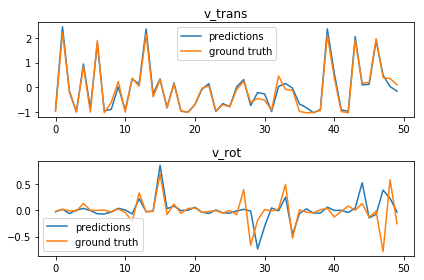

In [11]:
l = range(300, 350)
plt.subplot(2,1,1)
plt.plot(pred_velocities[l,0],label = 'predictions')
plt.plot(y_val[l,0], label = 'ground truth')
plt.legend()
plt.title('v_trans')
plt.subplot(2,1,2)
plt.plot(pred_velocities[l,1],label = 'predictions')
plt.plot(y_val[l,1], label = 'ground truth')
plt.legend()
plt.title('v_rot')
plt.tight_layout()

In [14]:
error_trans = np.linalg.norm(pred_velocities[:,0]-y_val[:,0])/y_val.shape[0]
error_rot = np.linalg.norm(pred_velocities[:,1]-y_val[:,1])/y_val.shape[0] 
print(f'error for v_trans: {error_trans} m/s')
print(f'error for v_rot: {error_rot} rad/s')

error for v_trans: 0.008404064060446031 m/s
error for v_rot: 0.058601742574786446 rad/s
